In [1]:
#--------------------------------------------------------------------------------
# 01. Waveshaping
#
# This notebook includes examples for getting started with SignalFlow,
# focusing on time-domain processing and specifically waveshaping.
#
# Requirements:
#   pip3 install matplotlib ipython ipywidgets numpy
#--------------------------------------------------------------------------------

from signalflow import *
from ipywidgets import interact
from IPython import display
import matplotlib.pyplot as plt
import numpy as np 

#--------------------------------------------------------------------------------
# Create the audio processing graph. Typically, you'll create this once and
# then leave it running forever. To clear the graph and start over, run:
#
#   graph.clear()
#--------------------------------------------------------------------------------
graph = AudioGraph()

Output device: MacBook Pro Speakers (44100Hz, buffer size 512 samples, 2 channels)


In [2]:
#--------------------------------------------------------------------------------
# Load an example audio file and display a playback widget
#--------------------------------------------------------------------------------

filename = "audio/sunkilmoon-truckers-atlas-loop.wav"
buffer = Buffer(filename)
display.Audio(buffer.data, rate=buffer.sample_rate)

In [3]:
#--------------------------------------------------------------------------------
# Create a waveshaper buffer. This is a special case of a Buffer that has
# helper methods to map an input sample (-1..1) to an output sample, helpful
# for distortion effects.
#--------------------------------------------------------------------------------
shaper_buf = WaveShaperBuffer(1024)

def plot_waveshaper_buffer(buf):
    x = np.linspace(-1, 1, 1000)
    y = [buf.get(value) for value in x]
    fig, ax = plt.subplots(1, figsize=(16, 8), dpi=200)
    
    ax.set_xlabel("sample input value")
    ax.set_ylabel("sample output value")
    ax.plot(x, y, linewidth=1)
    ax.plot(x, x, linewidth=1, linestyle=":")
    ax.grid(linewidth=0.2)

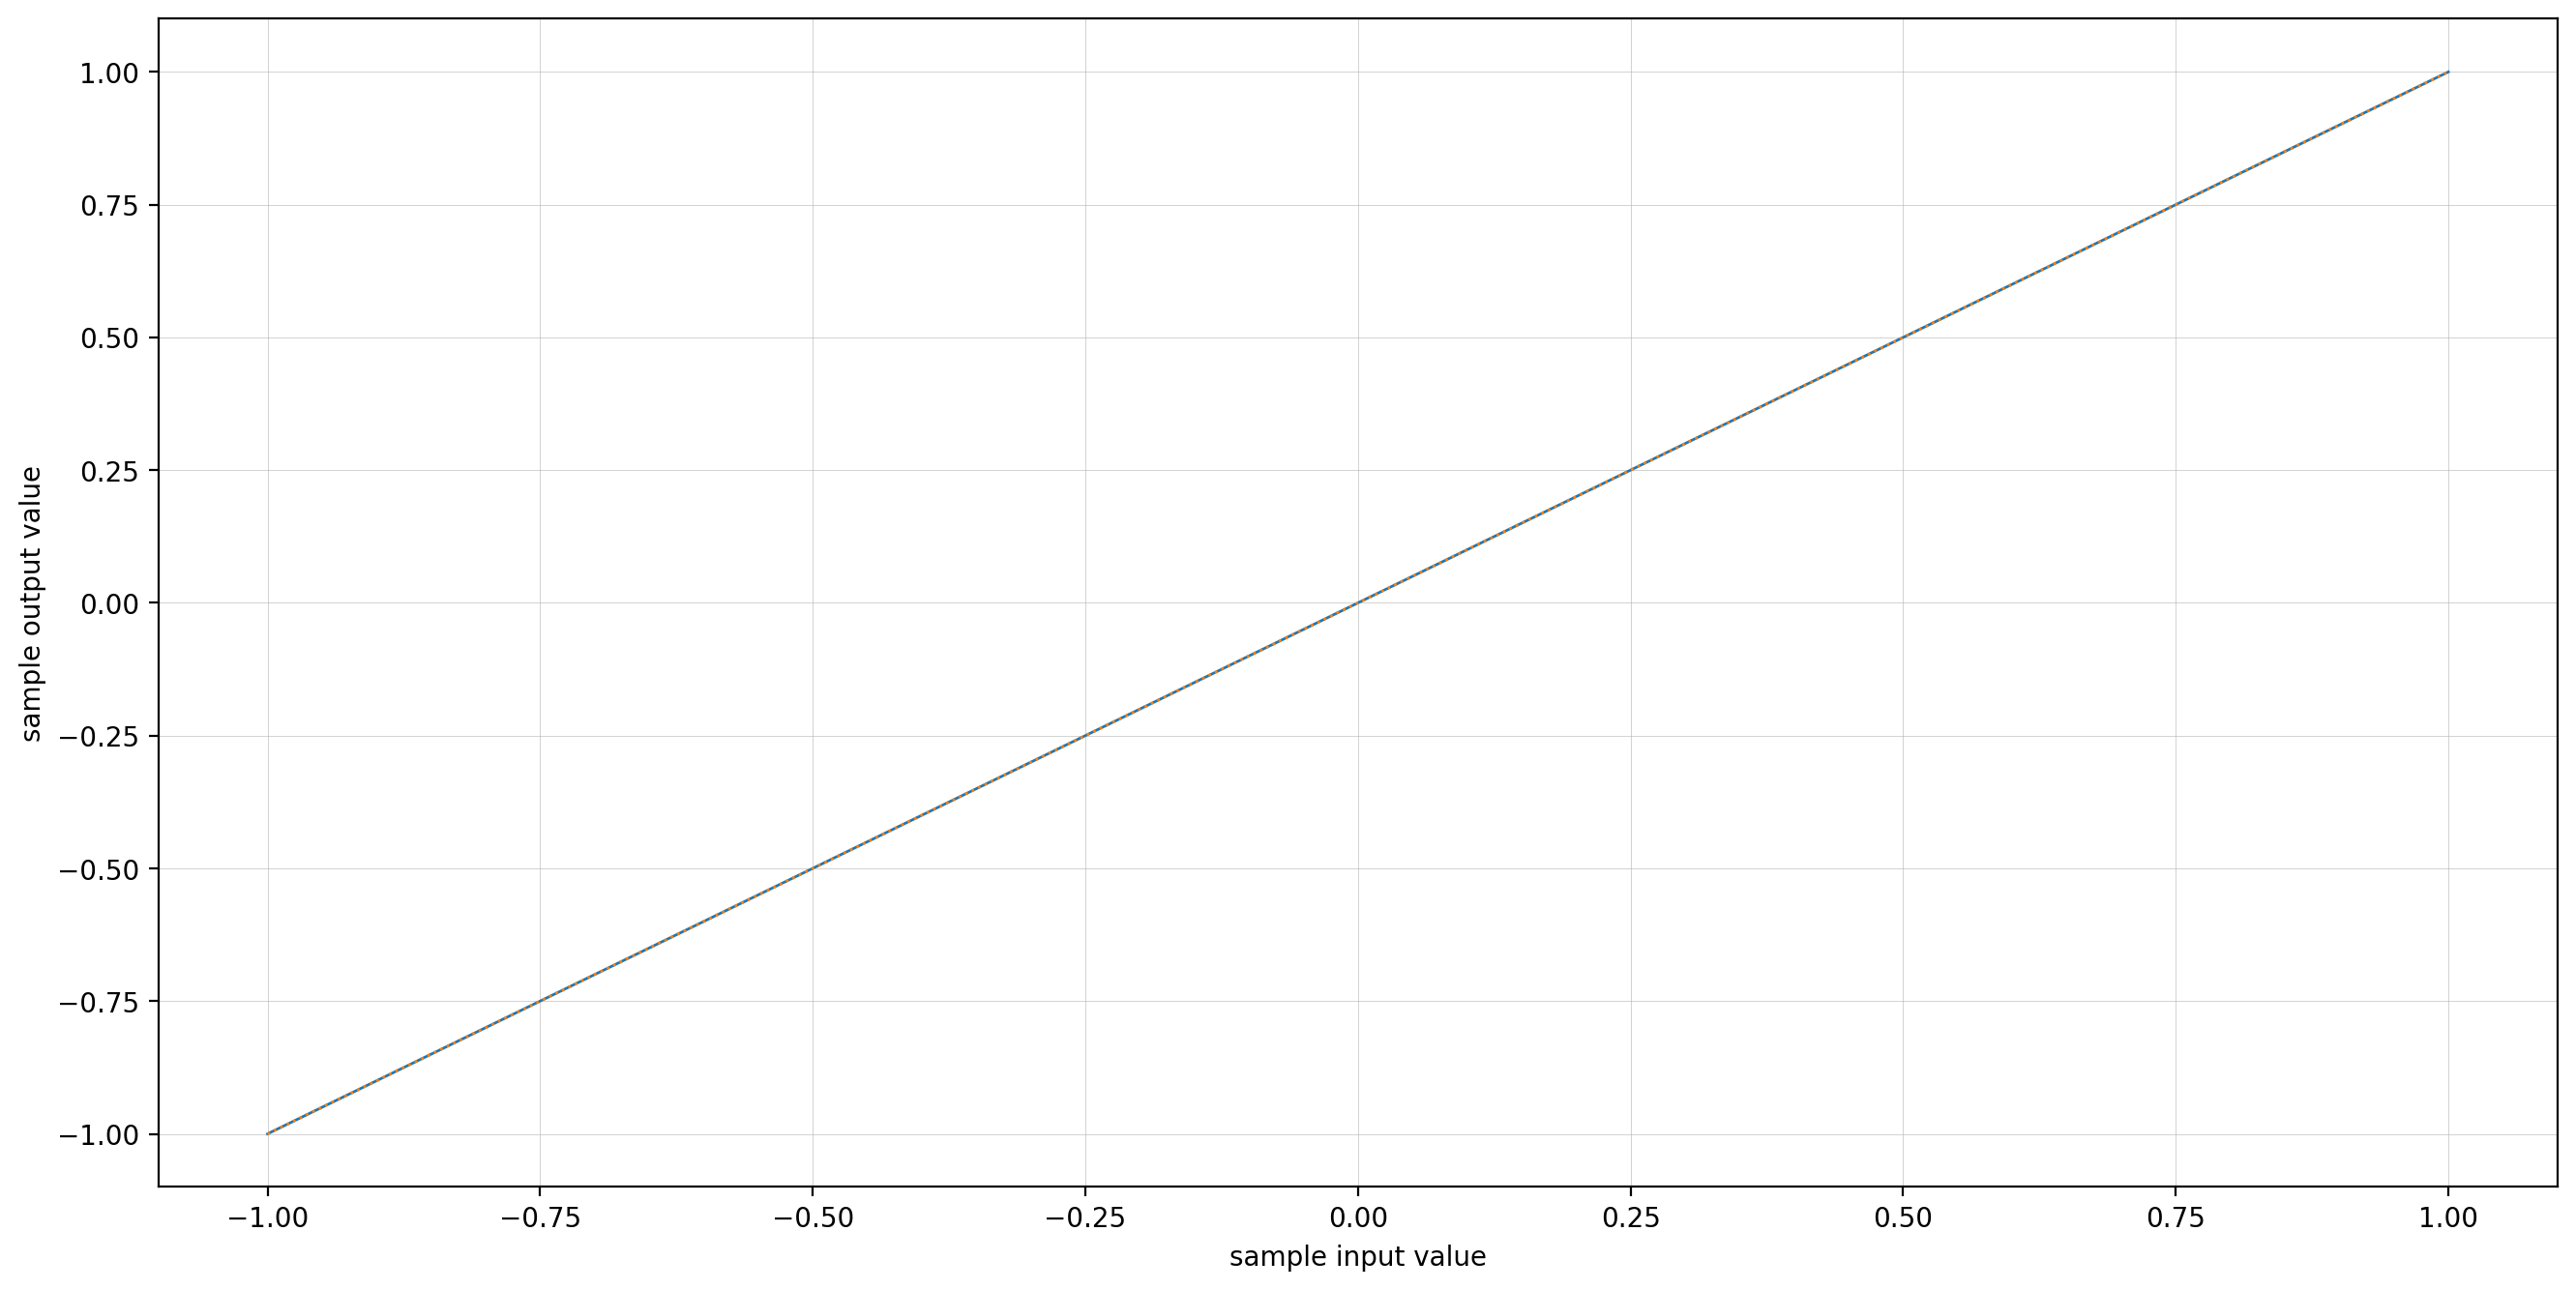

In [4]:
#--------------------------------------------------------------------------------
# Fill the contents of the waveshaper buffer with a different mapping, 
# and plot the output.
#
# Try uncommenting each of the below lines to see and hear the impact.
#--------------------------------------------------------------------------------

shaper_buf.fill(lambda x: x)
# shaper_buf.fill(lambda x: clip(x * 2, -1, 1))
# shaper_buf.fill(lambda x: np.tanh(x * 4))
# shaper_buf.fill(lambda x: np.sin(x * 2))
# shaper_buf.fill(lambda x: np.abs(x))
# shaper_buf.fill(lambda x: 1 - x if x > 0 else -1 - x)
# shaper_buf.fill(lambda x: 1 if np.abs(x) > 0.4 else 0)

plot_waveshaper_buffer(shaper_buf)

In [7]:
#--------------------------------------------------------------------------------
# Interactive waveshaping. Use the controls to modify the wet/dry mix.
# More distortion effects, EQs and filters: signalflow.dev/library/processors
#--------------------------------------------------------------------------------
player = BufferPlayer(buffer, loop=True)
shaper = WaveShaper(player, shaper_buf)
wetdry = WetDry(player, shaper)
attenuated = wetdry * 0.5
attenuated.play()

#--------------------------------------------------------------------------------
# Display an iPython slider widget.
#--------------------------------------------------------------------------------
@interact(on=True, wet=(0, 1, 0.01))
def update(on, wet):
    wetdry.wetness = wet * on

interactive(children=(Checkbox(value=True, description='on'), FloatSlider(value=0.0, description='wet', max=1.…

In [8]:
graph.clear()